<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Numpy Ladder Challenge - Notebook 3

_Author:_ Tim Book

# Climb the Ladder!
Our class moves quickly! Sometimes, it feels like we make leaps in logic that are a bit too big. In this ladder challenge, we'll learn some core math concepts, some linear algebra, and the `numpy` library. Problems in this notebook start out easy and progressively get harder, so that the next rung of the Python ladder is always within reach.

Additionally, since not all of the topics discussed in this ladder challenge are explicitly taught in our course, these problems come with many more hints, tips, suggestions, and even sometimes a mini-lesson. You are encouraged to Google frequently throughout the lesson. In many ways, this ladder is meant to be a challenge as well as educational in its own right.

**Remember our one rule: NO LOOPS! None of the exercises in this notebook require a loop. If you use a loop to solve any of these problems, you are solving the problem incorrectly.**

0) Import numpy in the usual way

In [1]:
import numpy as np

# Section V: All the Matrix Algebra in the World
This final section is going to be a little bit different. We are aware than many students come to DSI from a wide variety of backgrounds, and many students have very little experience with linear algebra. However, data science is an intensely mathematical subject, and most of that math is linear algebra.

This section is going to teach you some of the linear algebra topics we need while also giving you hands-on examples of how it might be carried out in raw `numpy`.

## Part 1: Vector Norms
While vectors are often drawn as arrows, really they are simply points on a coordinate plane. They can be denoted many ways using mathematical notation, but which you use depends on what field of study you are in, or whichever is most convenient to your situation. That is, the following are all the same vector:

$$
\mathbf{v} = (3, 4) = 
\begin{bmatrix}
3 \\ 4
\end{bmatrix} =
\begin{bmatrix}
3 & 4
\end{bmatrix}
$$

Where the middle one (the "column vector") is often the most convenient when doing matrix algebra, so that is what we will use.

The **norm** of a vector is the distance from that vector to the **origin** (that is, $(0, 0)$). It is denoted and computed as follows:

$$
\|\mathbf{v}\| =
    \sqrt{\mathbf{v}^T\mathbf{v}} =
    \sqrt{\mathbf{v} \cdot \mathbf{v}} =
    \sqrt{\sum v_i^2}
$$

For the next few problems, we'll use the following vectors:

In [2]:
v = np.load("data/v.npy")
w = np.load("data/w.npy")

68) Compute the vector norm of the vector $\mathbf{v}$ using the matrix algebra we've learned so far in `numpy`.

In [14]:
norm = np.sqrt(np.dot(v,v))
norm

32.429124701516265

69) Compute the vector norm of the vector $\mathbf{v}$ using a built-in `numpy` function.

* _Hint:_ `np.linalg.something()`

In [17]:
np.linalg.norm(v)

32.429124701516265

**The distance between two vectors** is given by the norm of their difference. That is,

$$d(\mathbf{v}, \mathbf{w}) = \|\mathbf{v} - \mathbf{w}\|$$

70) Compute the distance between $\mathbf{v}$ and $\mathbf{w}$

In [18]:
np.linalg.norm(v-w)

45.6414871816229

There are actually many kinds of distances. The one I've shown you so far is the most common, and it goes by many names, usually **Euclidean distance** or **$\mathcal{l}_2$ distance**. There is also an **$\mathcal{l}_1$ distance**, sometimes called **Taxi cab distance** or **Manhattan distance**:

$$\|\mathbf{v}\|_1 = \sum |v_i|$$

Can you figure out why it gets these names?

71) Compute the Manhattan distance between $\mathbf{v}$ and $\mathbf{w}$.

* _Hint:_ You can actually use the same function from numbers 69 and 70!

In [21]:
sum(abs(v-w))

1146.0421250060456

In [22]:
np.linalg.norm(v-w, ord=1)

1146.0421250060474

## Part 2: Linear Regression
The first type of machine learning model (aka "statistical model") we'll learn in our course is the **ordinary least squares linear regression model** (usually just **linear regression** or **OLS** for short).

In linear regression, we believe that our (quantitative) $y$ variable depends on some linear relationship of our $x$ variables. That is, if we have 3 $x$s, for observation $i$,

$$y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \beta_3x_{3i}$$

We often like to incorporate _all_ of our data into this equation by writing this formula in matrix notation, which is actually much more concise:

$$\mathbf{y} = \mathbf{X}\beta$$

Where

$$
\begin{align}
\mathbf{y} = 
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
& \text{, }
\mathbf{\beta} = 
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_p
\end{bmatrix}
\end{align}
$$

and the **data matrix** (or **design matrix**) is:

$$
\mathbf{X} =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np} \\
\end{bmatrix}
$$

72) Using a paper and pencil, multiply out $\mathbf{y} = \mathbf{X}\beta$ as denoted above. Verify to yourself that this makes sense, and that it matches the first equation above (for $p = 3$). Really, take the time to do this! Being comfortable with equations like these is an import concept in our course.

In [23]:
# from my linear algebra book, David C. Lay, 4th ed, p 35

![image](abx.jpg)

73) We load some data below. However, it doesn't include that column of ones that corresponds to the $y$-intercept ($\beta_0$). Create a matrix $\mathbf{X}$ by adding the column of ones.

* _Hint:_ Use `np.hstack()`

In [24]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [25]:
X

array([[ 0.6087,  1.6917, -0.6201, ..., -0.2786,  0.6323,  0.4737],
       [ 0.6453, -0.6079,  0.0247, ...,  2.0312, -0.2234, -0.6828],
       [ 0.9917,  0.4737,  0.1412, ...,  0.1912, -1.2856,  0.859 ],
       ...,
       [ 0.792 ,  0.8342,  0.4231, ..., -0.3911,  0.2815,  1.2973],
       [ 0.6943,  0.5562,  0.631 , ...,  0.8043, -2.5401, -0.1373],
       [-0.6173,  1.236 ,  0.107 , ...,  0.0737, -1.1795,  0.0736]])

In [27]:
y[:5]

array([ 43.83293388, -57.53377397,   0.39201501,  13.26679992,
        65.94408029])

In [41]:
ones = np.ones((len(X), 1))
X = np.hstack((ones, X))
X

array([[ 1.    ,  0.6087,  1.6917, ..., -0.2786,  0.6323,  0.4737],
       [ 1.    ,  0.6453, -0.6079, ...,  2.0312, -0.2234, -0.6828],
       [ 1.    ,  0.9917,  0.4737, ...,  0.1912, -1.2856,  0.859 ],
       ...,
       [ 1.    ,  0.792 ,  0.8342, ..., -0.3911,  0.2815,  1.2973],
       [ 1.    ,  0.6943,  0.5562, ...,  0.8043, -2.5401, -0.1373],
       [ 1.    , -0.6173,  1.236 , ...,  0.0737, -1.1795,  0.0736]])

74) What are the dimensions of $\mathbf{X}$? How many observations are in this data set, and how many variables? What should be the size of $\beta$?

In [42]:
X.shape

(1000, 8)

The goal of OLS is to estimate $\beta$. When we estimate a value, we like to put a "hat" on it. The estimate of $\beta$ is then $\hat{\beta}$, and our predictions for our observations are $\hat{\mathbf{y}}$. OLS is one of the rare opportunities where we can computer $\hat{\beta}$ directly. It has the following formula:

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

75) Compute $\hat{\beta}$. Save it as `beta_hat`.

In [63]:
beta_hat = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))
beta_hat

array([ 9.21338758, -0.04410451, -1.89056824, -3.28185065,  6.5987268 ,
       -9.38381361,  5.91130679,  1.25934086])

In [64]:
beta_hat.shape

(8,)

76) Compute our predictions. That is, $\mathbf{\hat{y}} = \mathbf{X}\hat{\beta}$. Save this as `y_hat`.

In [88]:
X[0]

array([ 1.    ,  0.6087,  1.6917, -0.6201,  0.7833, -0.2786,  0.6323,
        0.4737])

In [89]:
beta_hat[0]

9.21338758005503

In [91]:
y[0]

43.832933878549

In [92]:
y_hat = X @ beta_hat
y_hat[0]

20.140724689192893

In [93]:
y_hat.shape

(1000,)

A variant on OLS is called **ridge regression**, where, for some number $\lambda$, we instead compute

$$\hat{\beta}^\text{ridge} = (\mathbf{X}^T\mathbf{X} + \lambda I)^{-1}\mathbf{X}^Ty$$

where $I$ is the approprate identity matrix.

77) Compute $\hat{\beta}^\text{ridge}$ for $\lambda = 50$. Call this `beta_hat_ridge`.

In [68]:
# using another method for matrix multiplication
# instead of MATRIX.dot(matrix) OR np.matmul()
# we are going to use X @ Y

In [74]:
X.shape[1]

8

In [73]:
np.identity(8)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [75]:
beta_hat_ridge = np.linalg.inv((X.T @ X) + 50 * np.identity(X.shape[1])) @ X.T @ y
beta_hat_ridge

array([ 8.73314189, -0.03885905, -1.79694978, -3.1221618 ,  6.26220376,
       -8.91860506,  5.62461313,  1.1329233 ])

78) Compute the predictions for this model, $\hat{\mathbf{y}}^\text{ridge}$. Call this `y_hat_ridge`.

In [97]:
y_hat_ridge = X @ beta_hat_ridge
y_hat_ridge[0]

19.08865719850623

79) Compute $\|\hat{\beta}\|$ and $\|\hat{\beta}^\text{ridge}\|$. Which is smaller?

In [98]:
np.linalg.norm(beta_hat), np.linalg.norm(beta_hat_ridge)

(16.351204494448893, 15.521684840371742)

In [99]:
# Ridge is smaller than OLS

## Part 3: MSE

Computing $\hat{\beta}$ involves minimizing the MSE. We can now also write the MSE in terms of matrix algebra:

$$
\begin{align}
MSE &= \frac{1}{n} \sum (y_i - \hat{y}_i)^2 \\
    &= \frac{1}{n} (\mathbf{y} - \hat{\mathbf{y}})^T(\mathbf{y} - \hat{\mathbf{y}}) \\
    &= \frac{1}{n} \|\mathbf{y} - \hat{\mathbf{y}}\|^2
\end{align}
$$

80) Take a paper and pencil and verify that all three of these things are equivalent.

In [94]:
y.shape

(1000,)

In [95]:
y_hat.shape

(1000,)

In [104]:
y_hat_ridge.shape

(1000,)

81) Compute the $MSE$ using the first equation. (You already did this in an earlier exercise).

In [112]:
MSE = sum((y - y_hat) ** 2).mean()
MSE

392620.6652397955

82) Compute the $MSE$ using the second equation. That is, using matrix multiplication.

In [114]:
MSE = ((y - y_hat).T @ (y - y_hat)).mean()
MSE

392620.6652397954

83) Compute the $MSE$ using the third equation. That is, using `np.linalg.norm()`.

In [115]:
MSE = (np.linalg.norm(y - y_hat) ** 2).mean()
MSE

392620.66523979546

84) Write a function that takes in `y` and `y_hat` and computes the $MSE$.

In [116]:
def my_MSE(y, y_hat):
    return (sum((y - y_hat) ** 2).mean() + ((y - y_hat).T @ (y - y_hat)).mean() + (np.linalg.norm(y - y_hat) ** 2).mean()).mean()

85) Compute the $MSE$ for both the OLS and ridge regression predictions in the previous part. Which model has a higher MSE?

In [117]:
#OLS
my_MSE(y, y_hat)

1177861.9957193863

In [118]:
# Ridge
my_MSE(y, y_hat_ridge)

1179792.9770955632

In [123]:
(my_MSE(y, y_hat_ridge) - my_MSE(y, y_hat)) / my_MSE(y, y_hat_ridge) * 100

0.1636712044964583

## Part 4: Singular Value Decomposition
There are many kinds of **matrix decomposition**. Matrix decomposition involves taking a matrix, and breaking it into the product of other matrices that are easier to work with. Any real-valued matrix $M$ can be broken up into its **singular value decomposition**:

$$M = USV^T$$

where:

* $U$ and $V$ are **orthonormal matrices** (more on this soon). The columns of $U$ and $V$ are referred to as the **left** and **right singular vectors**, respectively.
* $S$ is a **diagonal matrix**, where the elements of the diagonal are the **singular values** in descending order.

That is, $S$ looks like:

$$
S = 
\begin{bmatrix}
\sigma_1 & 0 & 0 & \cdots & 0 \\
0 & \sigma_2 & 0 & \cdots & 0 \\
0 & 0 & \sigma_3 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \sigma_m
\end{bmatrix}
$$

There are _**A LOT**_ of confusing definitions here, so let's dive into them individually.

Below, we read in a matrix of pixel values that make up a pleasant image. We can use `plt.imshow()` to plot a matrix visually.

(540, 540)


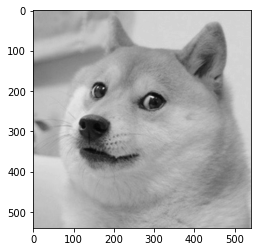

In [124]:
import matplotlib.pyplot as plt
doge = np.load("data/doge.npy")[:, 200:740]
print(doge.shape)
plt.imshow(doge, cmap="gray");

86) Use the `np.linalg.svd()` function to decompose our `doge` matrix. Please skim the documentation of this function! Note that it returns $V^T$, and not $V$. It also returns a vector of the singular values, not the full $S$ matrix.

In [143]:
U, S, V_transpose = np.linalg.svd(doge)

In [144]:
U

array([[-0.04898508,  0.00960518,  0.05230106, ...,  0.06465609,
        -0.11460688, -0.10560331],
       [-0.04898355,  0.010082  ,  0.05230489, ..., -0.07381867,
         0.11454699,  0.08638757],
       [-0.04896888,  0.01079021,  0.05234301, ..., -0.0582088 ,
        -0.05983593, -0.01456522],
       ...,
       [-0.04459999, -0.00746642, -0.01215188, ...,  0.07197971,
         0.02278895,  0.00511839],
       [-0.04464044, -0.00831092, -0.01123656, ..., -0.02563422,
        -0.00149461, -0.03251969],
       [-0.04475533, -0.00852905, -0.00918817, ...,  0.0301873 ,
         0.03094325,  0.00386342]])

In [146]:
S[:10]

array([350.90033109,  39.19451817,  29.71869604,  23.88388149,
        18.39123425,  14.98570774,  11.58510262,  11.06903402,
         9.21715424,   6.93118293])

In [149]:
V_transpose

array([[-0.04535277, -0.04535952, -0.04537153, ..., -0.05193788,
        -0.05226495, -0.05252192],
       [ 0.01158292,  0.01147342,  0.01156402, ...,  0.00575481,
         0.00525999,  0.00496767],
       [-0.06441635, -0.06407223, -0.06369724, ...,  0.00928956,
         0.00709087,  0.00556516],
       ...,
       [ 0.01515633, -0.00404179, -0.04381489, ...,  0.12135664,
         0.02342992, -0.03664625],
       [ 0.00047243, -0.01870686,  0.04159278, ..., -0.01875306,
         0.06742818,  0.00376786],
       [ 0.05390595, -0.04517239, -0.07753884, ..., -0.04974067,
         0.03350574,  0.01334014]])

The **singular values** are non-negative numbers in descending order. An easy way to think about them is that they represent how much _information_ we can represent in our matrix using a linear transformation. In the special case of a square matrix $M$, the singular values are also **eigenvalues**. (Similarly, the left singular vectors are the corresponding **eigenvectors**).

We recognize this still probably doesn't make a whole lot of sense. By the end of this exercise, we can interpret them visually, and hopefully that will clear things up.

87) Use our vector of singular values to make an `smat` matrix corresponding to $S$ as shown above.

* _Hint:_ Use `np.diag()`.

In [159]:
smat = S * np.identity(doge.shape[1])
smat

array([[3.50900331e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.91945182e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.97186960e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.43218209e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.79308687e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.35809610e-06]])

The matrices $U$ and $V$ are **orthonormal**. This means they have the following properties:

$$UU^T = UU^{-1} = I$$
$$VV^T = VV^{-1} = I$$

88) Verify the above using Python. Note that you might get precision errors (that is, `2.77e-17` instead of `0`).

In [189]:
np.array_equal((U @ U.T).round(1), (U @ np.linalg.inv(U)).round(1)) & (np.array_equal((U @ U.T).round(1),np.identity(U.shape[1])) )

True

In [191]:
V = V_transpose

In [192]:
np.array_equal((V @ V.T).round(1), (V.T @ np.linalg.inv(V.T)).round(1)) & (np.array_equal((V @ V.T).round(1),np.identity(V.T.shape[1])) )

True

Why do we do this at all?! For SVD, we seek to _approximate_ large, complex matrices. To see what we mean, let's see what happens when we remove singular values from our matrix.

89) Create a new matrix, $\tilde{S}$, that is the same as $S$, but with _all but the first 20_ singular values turned into zeros. You may call this variable `smat2`.

In [229]:
modifier = np.ones(540)

In [231]:
modifier[:20] = 0

In [232]:
modifier

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [233]:
smat2 = S * modifier * np.identity(doge.shape[1])

In [239]:
smat2[18:22,18:22]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 3.11775162, 0.        ],
       [0.        , 0.        , 0.        , 2.93078679]])

90) Let's approximate our original `doge` matrix. That is, recombine our decomposed matrix, but this time having removed most of our singular values:

$$\tilde{M} = U\tilde{S}V^T$$

You can call the result `doge_approx`.

In [247]:
doge_approx = U @ smat2 @ V_transpose

91) Visualize `doge_approx` using `plt.imshow()`. How has the image changed?

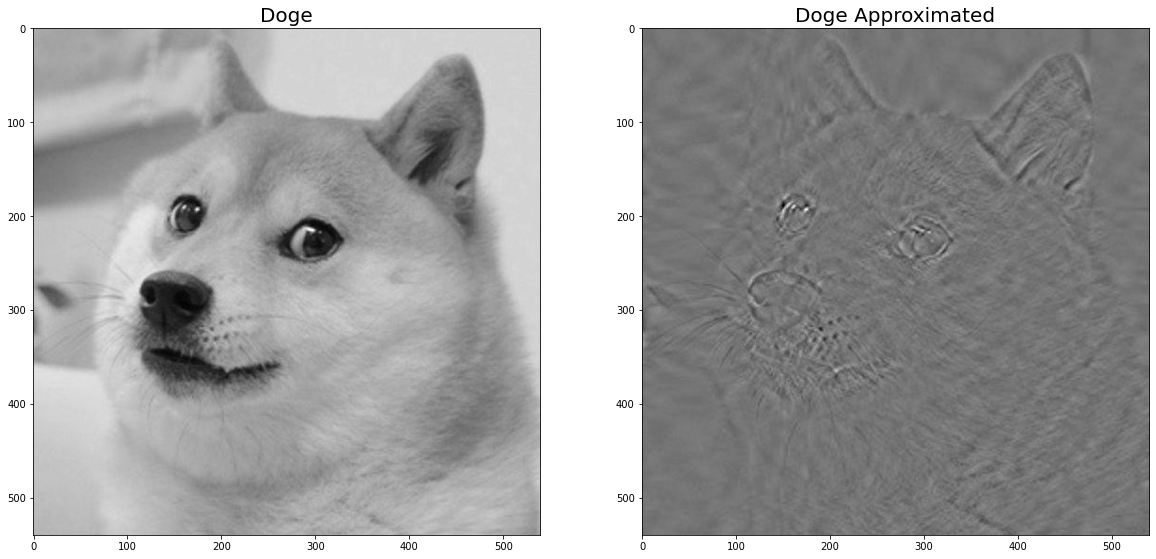

In [248]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
doge = np.load("data/doge.npy")[:, 200:740]
plt.title('Doge', fontsize=20)
plt.imshow(doge, cmap="gray");
plt.subplot(1,2,2)
plt.title('Doge Approximated', fontsize=20)
plt.imshow(doge_approx, cmap="gray");

92) Try this again with values besides 20. Can you still tell what the original image was with only 10 singular values?

In [355]:
# What happens if you try to rebuild the image using only the diagonal

In [360]:
smat

array([[3.50900331e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.91945182e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.97186960e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.43218209e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.79308687e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.35809610e-06]])

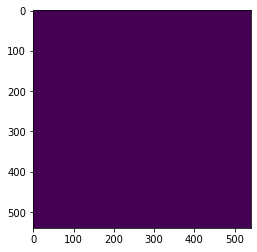

In [361]:
plt.imshow(smat)

In [249]:
# THIS IS THE ONLY TIME I AM GOING TO USE A FOR LOOP, BECAUSE WE ARE SHOWING PRETTY PICTURES

In [255]:
list_modifiers = []
for i in range(1,S.shape[0]+1):
    base = np.ones(540)
    base[:i] = 0
    list_modifiers.append(base)

In [269]:
list_modifiers[0].shape

(540,)

In [275]:
S_modified_list = [i * S * np.identity(doge.shape[1]) for i in list_modifiers]

In [276]:
S_modified_list[0].shape

(540, 540)

In [277]:
doge_modified_list = [U @ i @ V_transpose for i in S_modified_list]

In [278]:
U.shape

(540, 540)

In [279]:
V_transpose.shape

(540, 540)

In [280]:
doge_modified_list[0].shape

(540, 540)

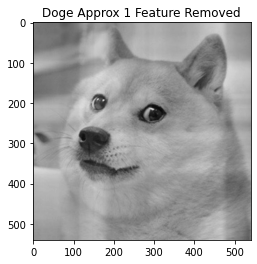

In [351]:
# Show first one
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(doge_modified_list[0], cmap='gray')
ax.title.set_text(f'Doge Approx {1} Feature Removed')
ax.set_facecolor('white')
fig.savefig(f'Doge Approx {1} Feature Removed.jpg', bbox_inches = 'tight',
    pad_inches = .1, dpi=50)

In [353]:
for i in range(S.shape[0]):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.imshow(doge_modified_list[i], cmap='gray')
    ax.title.set_text(f'Doge Approx {i+1} Feature Removed')
    ax.set_facecolor('white')
    plt.savefig(f'./blessed-doge-posting/{str(i+1).zfill(3)}.jpg', bbox_inches = 'tight',
        pad_inches = .1, dpi=50)
    plt.close()

In [354]:
# This is purely for fun
# https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
import glob
from PIL import Image

# filepaths
fp_in = "./blessed-doge-posting/*.jpg"
fp_out = "blessed_doge.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=.00005, loop=0)

### Still... so what?
SVD is at the heart of one of our most confusing topics - **principal component analysis**. PCA involves carrying out SVD on our data matrix in order to **reduce its dimensionality**. That is, can we still have all the information we need in a data set while having fewer variables?